подсказка по интегралам и производным  
https://mathdf.com/int/ru/

In [1]:
import sympy as sp
sp.init_printing()
import warnings
warnings.filterwarnings("ignore")

In [2]:
sp.var('n')
# Ответ есть только в комплексном корне
sp.solve(sp.exp(n) + 1, n)

---

### Интегрирование

In [3]:
x, y, a, b = sp.symbols('x y a b', real=True)  # переменные принанадлежат R

In [4]:
sp.integrate(1 / x, x)

In [5]:
res = sp.integrate(sp.cos(x)**2, x); res.together()

In [6]:
## Проверка интегрирования
sp.diff(res, x)

In [7]:
sp.diff(res, x).simplify()

Подынтегральное выражение может содержать несколько символьных
переменных, по одной из которых будет выполняться интегрирование.

In [8]:
((a + x) ** 3).expand()

In [13]:
int_res = sp.integrate((a + x) ** 3, x); int_res

Если первообразную не удалось найти, то возвращается невычисляемый
объект $Integral$.

In [9]:
sp.integrate(x ** x, x)

In [10]:
type(_)

sympy.integrals.risch.NonElementaryIntegral

Для вычисления определенного интеграла в функцию $integrate()$ вторым
аргументом нужно передать кортеж вида $(var,lower\_limit,upper\_limit)$,
содержащий имя переменной интегрирования $var$, а также нижний
$lower\_limit$ и верхний $upper\_limit$ пределы интегрирования.

**Пример**. Вычислим определенный интеграл: <font size='4'>$\int_{0}^{\pi} sin(x)\, dx$ </font>

In [11]:
sp.integrate(sp.sin(x), (x, 0, sp.pi))

In [12]:
F_x = sp.integrate(sp.sin(x));F_x

In [13]:
# Проверка с помощью подстановки
Integral_result = F_x.subs({x: sp.pi}) - F_x.subs({x: 0})
Integral_result

Аналогично вычисляются несобственные интегралы с бесконечными пределами интегрирования.

**Пример 1**. Вычислим несобственный интеграл: <font size='4'>$\int_{0}^{\infty} e^{-x}\, dx$ </font>

In [14]:
sp.integrate(sp.exp(-x), (x, 0, sp.oo))

**Пример 2**. Вычислим несобственный интеграл: <font size='4'>$\int_{-\infty}^{\infty} e^{-x^{2}}\, dx$ </font>

In [16]:
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

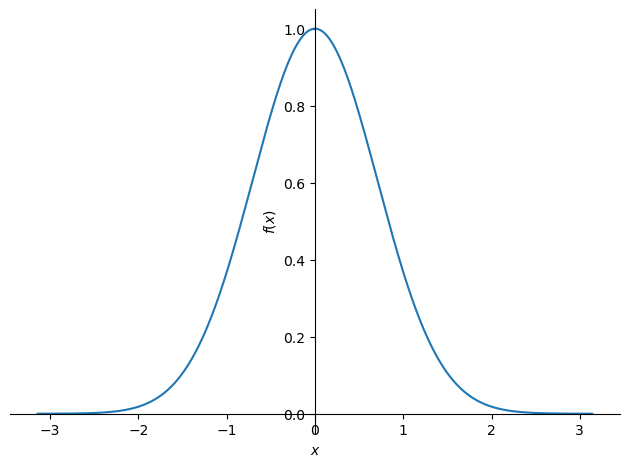

In [17]:
sp.plot(sp.exp(-x**2),(x, -sp.pi, sp.pi));

In [18]:
sp.integrate(1/(x ** 2 + 16), (x, 0, sp.oo))

In [19]:
## Результат - [0;2]
sp.integrate(sp.sin(x), (x, 0, sp.oo))

In [20]:
type(sp.integrate(sp.sin(x), (x, 0, sp.oo)))

sympy.calculus.accumulationbounds.AccumulationBounds

In [21]:
## Пример расходящегося интеграла
sp.integrate(sp.exp(x), (x, 0, sp.oo))

Функцию $integrate()$ можно использовать для вычисления повторных интегралов.

**Пример 3**. Вычислим интеграл от двух переменных: <font size='4'>$\int(\int (xy)\, dx) \,dy$ </font>

In [22]:
sp.integrate(x * y, x, y)

**Пример 4**. Вычислим интеграл от двух переменных: <font size='4'>$\int_{0}^{1}(\int_{0}^{1} (xy)\, dx) \,dy$ </font>

In [23]:
sp.integrate(x * y, (x, 0, 1), (y, 0, 1)) # кортеж(переменная, а, b)

**Пример 5**. Вычислим интеграл от двух переменных: <font size='4'>$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{(-x^2-y^2)}\, dx \,dy$ </font>

In [24]:
sp.integrate(sp.exp(-x**2-y**2),(x,-sp.oo, sp.oo),(y, -sp.oo, sp.oo))

Внутренние пределы интегрирования могут зависеть от переменной интегрирования внешнего интеграла.  
Вот пример вычисления повторного интеграла по верхней половине единичного круга.

**Пример 6**.  <font size='4'>$\int_{-1}^{1}\,dx\int_{0}^{\sqrt{1-x^2}} x^2y \,dy$ </font>

In [25]:
sp.integrate(x**2 * y, (y, 0, sp.sqrt(1-x**2)), (x,-1,1))

---

У $integrate()$ есть невычисляемый эквивалент – функция $Integral()$. Она
возвращает объект типа '$sympy.integrals.integrals.Integral$'. Чтобы
потом вычислить интеграл, нужно использовать метод $doit()$.

In [26]:
int_1 = sp.Integral((2*x**2 + 3*x - 1), x); int_1

In [27]:
int_1.doit()

In [28]:
F = sp.lambdify(x, int_1.doit(), 'numpy'); F

<function _lambdifygenerated(x)>

In [29]:
F(-3) - F(1)

In [30]:
int_1.doit().subs({x: -3}) - int_1.doit().subs({x: 1})

In [31]:
## Точный ответ
sp.integrate(1 / (x**2 + 1), (x, 0, sp.oo))

In [32]:
sp.integrate(1/((x+1)*(x+3)*(x+5)))

In [33]:
sp.integrate((2 * x + 3) ** 7)